In [2]:
import iapi_TNG as iapi
#this package contains useful functions for downloading the neccessary data
#make sure you have edited iapi_TNG.py to include your personal API key
import numpy as np
import h5py #most TNG data is downloaded as hdf5 files
import matplotlib.pyplot as plt
import os.path
#from scipy.stats import binned_statistic
 
baseUrl = 'http://www.tng-project.org/api/'

In [3]:
####EDIT THIS FOR YOUR MACHINE#####
#get current director
'!pwd'
#get current directory
currentdirc=!pwd
print(currentdirc)
dirc= ' '.join(currentdirc) + '/TNG_workshop_data/'
print(f"current dirc {dirc}")

['/Users/alexpoulin/Downloads/git/TNG/TNG_workshop']
current dirc /Users/alexpoulin/Downloads/git/TNG/TNG_workshop/TNG_workshop_data/


In [4]:
###specify which simulation you want to explore###
sim='TNG100-1'

In [5]:
r=iapi.get(baseUrl)
print(r)
#check the properties of the simulation you have selected
simUrl = baseUrl+sim
print(simUrl) 
simdata = iapi.get(simUrl)
print(simdata['description'])

{'simulations': [{'name': 'Illustris-1', 'num_snapshots': 134, 'url': 'http://www.tng-project.org/api/Illustris-1/'}, {'name': 'Illustris-1-Dark', 'num_snapshots': 136, 'url': 'http://www.tng-project.org/api/Illustris-1-Dark/'}, {'name': 'Illustris-2', 'num_snapshots': 136, 'url': 'http://www.tng-project.org/api/Illustris-2/'}, {'name': 'Illustris-2-Dark', 'num_snapshots': 136, 'url': 'http://www.tng-project.org/api/Illustris-2-Dark/'}, {'name': 'Illustris-3', 'num_snapshots': 136, 'url': 'http://www.tng-project.org/api/Illustris-3/'}, {'name': 'Illustris-3-Dark', 'num_snapshots': 136, 'url': 'http://www.tng-project.org/api/Illustris-3-Dark/'}, {'name': 'TNG100-1', 'num_snapshots': 100, 'url': 'http://www.tng-project.org/api/TNG100-1/'}, {'name': 'TNG100-1-Dark', 'num_snapshots': 100, 'url': 'http://www.tng-project.org/api/TNG100-1-Dark/'}, {'name': 'TNG100-2', 'num_snapshots': 100, 'url': 'http://www.tng-project.org/api/TNG100-2/'}, {'name': 'TNG100-2-Dark', 'num_snapshots': 100, 'url

In [6]:
simdata.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [7]:
if not os.path.exists(dirc + 'catalogs'):
    os.makedirs(dirc + 'catalogs')
    print(f'created directory: {dirc} "catalogs"')
if not os.path.exists(dirc + 'catalogs/SubhaloFlag'):
    os.makedirs(dirc + 'catalogs/SubhaloFlag')
    print(f'created directory: {dirc} "/catalogs/SubhaloFlag"')
flag=iapi.getSubhaloField('SubhaloFlag',simulation=sim,fileName=dirc+'catalogs/SubhaloFlag',rewriteFile=0)

In [14]:
#let's fetch a field that will tell us about the mass of the galaxy
#SubhaloMassType gives the total mass of all bound particles, separated by particle type
mass=iapi.getSubhaloField('SubhaloMassType',simulation=sim,fileName=dirc+'catalogs/MassType',rewriteFile=0)
print(mass.shape)

(4371211, 6)


In [15]:
#Pull the stellar mass: 
print(mass[:,3])
stellar_mass=mass[:,4]
print(stellar_mass)

[0. 0. 0. ... 0. 0. 0.]
[251.01631   37.85255   42.482437 ...   0.         0.         0.      ]


Mass units in: 10^10 𝑀⊙/ℎ

In [16]:
h = simdata.get('hubble')
print(h)
stellar_mass=stellar_mass*10**10/h #convert to one solar masses

0.6774


Save SFR

In [17]:
if not os.path.exists(dirc + 'catalogs/SubhaloSFR'):
    os.makedirs(dirc + 'catalogs/SubhaloSFR')
    print(f'created directory: {dirc} "catalogs/SubhaloSFR"')
sfr_inst = iapi.getSubhaloField('SubhaloSFR',simulation = sim,fileName=dirc+'catalogs/SubhaloSFR',rewriteFile=0)

Get group number

In [18]:
if not os.path.exists(dirc + 'catalogs/SubhaloGrNr'):
    os.makedirs(dirc + 'catalogs/SubhaloGrNr')
    print(f'created directory: {dirc} "catalogs/SubhaloGrNr"')
groupNum = iapi.getSubhaloField('SubhaloGrNr',simulation = sim,fileName=dirc+'catalogs/SubhaloGrNr',rewriteFile=0)

Get Pos

In [19]:
if not os.path.exists(dirc + 'catalogs/SubhaloPos'):
    os.makedirs(dirc + 'catalogs/SubhaloPos')
    print(f'created directory: {dirc} "catalogs/SubhaloPos"')
pos = iapi.getSubhaloField('SubhaloPos',simulation = sim,fileName=dirc+'catalogs/SubhaloPos',rewriteFile=0)

Get magnetic field

In [20]:
if not os.path.exists(dirc + 'catalogs/SubhaloBfldHalo'):
    os.makedirs(dirc + 'catalogs/SubhaloBfldHalo')
    print(f'created directory: {dirc} "catalogs/SubhaloBfldHalo"')
Bfld = iapi.getSubhaloField('SubhaloBfldHalo',simulation = sim,fileName=dirc+'catalogs/SubhaloBfldHalo',rewriteFile=0)

In [21]:
print(stellar_mass)

[3.70558476e+12 5.58791711e+11 6.27139609e+11 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


Restrict to 10^9 solar masses

In [23]:
subID=np.arange(0,len(stellar_mass))

mask = (flag==1) & (stellar_mass>10**9)

print("Before trimming, there are ", len(stellar_mass), ' subhalos in our catalog')

IDs=subID[mask]
s_mass=stellar_mass[mask]
sfr_i = sfr_inst[mask]
groupNum_m = groupNum[mask]
Bfld_m = Bfld[mask]
s_pos = pos[mask]


print("After trimming, there are ", len(s_mass), ' subhalos in our catalog')

Before trimming, there are  4371211  subhalos in our catalog
After trimming, there are  21052  subhalos in our catalog


Seperate satellites from centrals

In [24]:
print(s_mass.shape)
print(sfr_i.shape)
print(groupNum_m.shape)
print(Bfld_m.shape)
print(s_pos.shape)
#should be same indexing for all three

(21052,)
(21052,)
(21052,)
(21052,)
(21052, 3)


In [25]:
# Unique group identifiers
groups = sorted(set(groupNum_m))  # Ensure unique and ordered group identifiers

# Initialize separate resulting arrays for a, b, and group c
grouped_s_mass = [[] for _ in groups]  # Each sub-list will store values ofmass
grouped_sfr_i = [[] for _ in groups]  # Each sub-list will store values of sfr
grouped_groupNum_i = [[] for _ in groups]  # Each sub-list will store corresponding group identifiers
grouped_bfld = [[] for _ in groups]  # Each sub-list will store values of Bfld
grouped_pos = [[] for _ in groups]  # Each sub-list will store values of position

# Group values into separate lists
for i in range(len(groupNum_m)):
    group_index = groups.index(groupNum_m[i])  # Determine the index for each group
    grouped_s_mass[group_index].append(s_mass[i])
    grouped_sfr_i[group_index].append(sfr_i[i])
    grouped_bfld[group_index].append(Bfld_m[i])
    grouped_groupNum_i[group_index].append(groupNum_m[i])
    grouped_pos[group_index].append(s_pos[i])

# Display the results
for i, group in enumerate(groups):
    print(f"Group {group}:")
    print(f"  s_mass: {grouped_s_mass[i]}")
    print(f"  sfr_i: {grouped_sfr_i[i]}")
    print(f"  Bfld: {grouped_bfld[i]}")
    print(f"  groupNum_i: {grouped_groupNum_i[i]}")
    print(f"  pos: {grouped_pos[i]}")

Group 0:
  s_mass: [3705584760045.8784, 558791711050.9565, 627139609297.1517, 171551466480.905, 133340394634.18263, 192150198184.95465, 289372437676.74426, 192698553877.6624, 223140347697.3005, 201115708172.33893, 236774638299.57315, 260189693868.77618, 83734808258.15575, 97074134180.17766, 168427331348.34824, 71538483670.65393, 100577204917.99556, 78666185537.27011, 86144799851.09007, 132973172300.71436, 42819491100.05787, 109763936655.76143, 48091494653.44105, 107320241249.51921, 29036093856.297943, 67762178342.744316, 49894117203.86254, 44136755509.40046, 37582803342.699265, 29564340240.59565, 51341160300.35027, 77012396858.33472, 44120072544.1666, 39299269288.48794, 51320032064.000305, 41275897981.988884, 26888973353.2167, 13369900799.445215, 23341217609.785072, 26985704634.86326, 28624219953.538677, 47906503798.44285, 7974474099.944537, 25130009841.24318, 24690170854.039696, 45522712204.0741, 25029322514.67619, 29656694883.578007, 10575793610.936884, 31664820593.08692, 26397443570

save pos

In [ ]:
#save pos as an .xyz file where the very first column is the number of particles
#and the second column is the particle type (0 for dark matter, 1 for gas, 4 for stars)
#and the remaining columns are the x,y,z coordinates of the particles

sperate centrals and satellites

In [17]:
#most massive of group
centrals_mass = []
satellites_mass = []
centrals_bfld = []
satellites_bfld = []

# Find largest/central galaxy in each group
for i, group in enumerate(groups):
    max_s_mass = max(grouped_s_mass[i])  # Find the maximum value in the mass for this group
    #print(f"Group {group}:")
    #print(f"  Largest a: {max_s_mass}")
    centrals_mass.append(max_s_mass) 
    centrals_bfld.append(grouped_bfld[i][grouped_s_mass[i].index(max_s_mass)])  # Find the Bfld value for the central galaxy
    satellites_mass.append(grouped_s_mass[i])
    satellites_bfld.append(grouped_bfld[i])
    satellites_mass[i].remove(max_s_mass)  # Remove the central galaxy from the list of satellites
    satellites_bfld[i].remove(centrals_bfld[i])  # Remove the central galaxy from the list of satellites
    
print(centrals_mass)
print(satellites_mass)
print(centrals_bfld)
print(satellites_bfld)

satellites_mass = np.concatenate(satellites_mass).flatten()
satellites_bfld = np.concatenate(satellites_bfld).flatten()
    

[3705584760045.8784, 2285439981483.66, 2833792745873.4683, 1424631975307.4138, 1202325452067.4177, 1340881068339.7688, 2225182181021.2993, 952085816546.9534, 2094143782177.2585, 2066222495796.1968, 1750284245065.577, 1596471867027.767, 594922536799.8563, 973366015704.2898, 1184906690635.2644, 957710214304.5791, 935517168340.6914, 1317181740674.3616, 805841732560.1277, 803658108391.6619, 848021055344.8849, 752950735348.3909, 1546026296871.8284, 744572310874.2699, 759625836111.361, 776391695268.6743, 869427791625.8684, 907390899703.2542, 583304773223.1292, 765191048058.1486, 811644701398.7881, 675072738967.3234, 981016021088.7908, 767100930812.2625, 409634457529.911, 526173853191.4016, 1310888109637.9539, 586140454959.3344, 349531210310.02905, 756218963433.8325, 795161030726.8312, 924853698532.2441, 647510622045.3722, 290691307029.5777, 548107517761.64496, 359984150952.14124, 794443649143.3237, 397307731283.77747, 493694639923.93365, 502057127590.75946, 996452874408.0653, 632536555589.53

In [18]:
print(centrals_mass)

[3705584760045.8784, 2285439981483.66, 2833792745873.4683, 1424631975307.4138, 1202325452067.4177, 1340881068339.7688, 2225182181021.2993, 952085816546.9534, 2094143782177.2585, 2066222495796.1968, 1750284245065.577, 1596471867027.767, 594922536799.8563, 973366015704.2898, 1184906690635.2644, 957710214304.5791, 935517168340.6914, 1317181740674.3616, 805841732560.1277, 803658108391.6619, 848021055344.8849, 752950735348.3909, 1546026296871.8284, 744572310874.2699, 759625836111.361, 776391695268.6743, 869427791625.8684, 907390899703.2542, 583304773223.1292, 765191048058.1486, 811644701398.7881, 675072738967.3234, 981016021088.7908, 767100930812.2625, 409634457529.911, 526173853191.4016, 1310888109637.9539, 586140454959.3344, 349531210310.02905, 756218963433.8325, 795161030726.8312, 924853698532.2441, 647510622045.3722, 290691307029.5777, 548107517761.64496, 359984150952.14124, 794443649143.3237, 397307731283.77747, 493694639923.93365, 502057127590.75946, 996452874408.0653, 632536555589.53

In [19]:
#isolate central galaxies
#mask_centrals = np.array(centrals_mass) > 0

subID=np.arange(0,len(centrals_mass))

noniso_mask = (centrals_mass > 0)
iso_mask = (centrals_mass==0)

#mask = (flag==1) & (stellar_mass>10**9)


print("Before trimming, there are ", len(centrals_mass), ' centrals in our catalog')

IDs=subID[mask]
centrals_noniso_mass = centrals_mass[noniso_mask]
centrals_noniso_bfld = centrals_bfld[noniso_mask]
centrals_iso_mass = centrals_mass[iso_mask]
centrals_iso_bfld = centrals_bfld[iso_mask]



print("After trimming, there are ", len(centrals_mass), ' centrals in our catalog')

TypeError: '>' not supported between instances of 'list' and 'int'

binnning

[       nan        nan        nan        nan        nan 0.85423429
        nan        nan 0.54384858 0.61881293 2.64606559 1.61318102
 0.16073821 1.30602475 0.12927121]


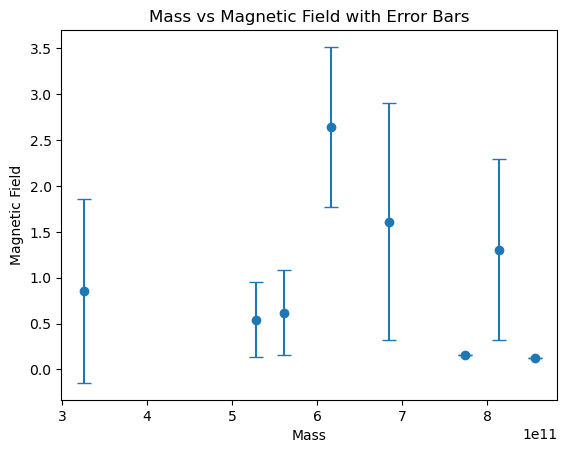

In [ ]:
# Define bins (e.g., 10 equal-width bins)
num_bins = 15
bins = np.linspace(min(satellites_mass), max(satellites_mass), num_bins + 1)

# Compute statistics for each bin
bin_means_x = []
bin_means_y = []
bin_std_y = []

for i in range(num_bins):
    # Select data in the current bin
    bin_mask = (satellites_mass >= bins[i]) & (satellites_mass < bins[i + 1])
    bin_masses = satellites_mass[bin_mask]
    bin_fields = satellites_bfld[bin_mask]
    
    if len(bin_masses) > 0:
        bin_means_x.append(bin_masses.mean())
        bin_means_y.append(bin_fields.mean())
        bin_std_y.append(bin_fields.std())
    else:
        bin_means_x.append(np.nan)
        bin_means_y.append(np.nan)
        bin_std_y.append(np.nan)

# Remove NaN bins if necessary
bin_means_x = np.array(bin_means_x)
bin_means_y = np.array(bin_means_y)
bin_std_y = np.array(bin_std_y)
#valid_bins = ~np.isnan(bin_means_x)

print(bin_means_y)
# Plot

num_bins = 10
# Use numpy's histogram function for equal width bins
hist, bins = np.histogram(data, bins=num_bins)

plt.errorbar(bin_means_x, bin_means_y, yerr=bin_std_y, fmt='o', capsize=5)
plt.xlabel('Mass')
plt.ylabel('Magnetic Field')
plt.title('Mass vs Magnetic Field with Error Bars')
plt.show()

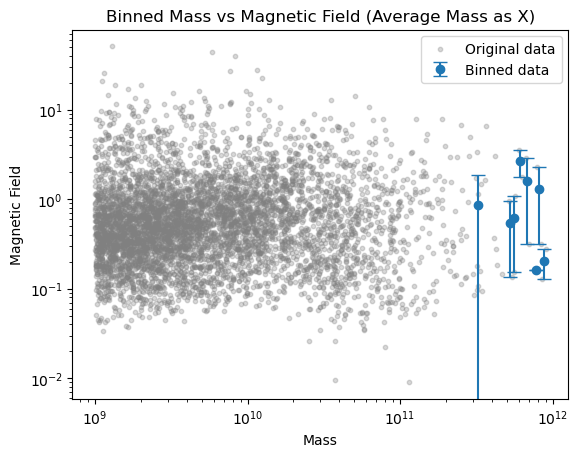

In [ ]:
# Use binned_statistic to compute the binned averages for magnetic field
bfield_means, bin_edges, bin_numbers = binned_statistic(satellites_mass, satellites_bfld, statistic='mean', bins=num_bins)

# Compute the bin-wise average mass (x-value)
mass_means = np.array([satellites_mass[bin_numbers == i].mean() if np.any(bin_numbers == i) else np.nan for i in range(1, num_bins + 1)])

# Compute the standard deviation of the magnetic field for error bars
bfield_std = np.array([satellites_bfld[bin_numbers == i].std() if np.any(bin_numbers == i) else np.nan for i in range(1, num_bins + 1)])

# Filter out bins with no data
valid_bins = ~np.isnan(mass_means) & ~np.isnan(bfield_means)
mass_means = mass_means[valid_bins]
bfield_means = bfield_means[valid_bins]
bfield_std = bfield_std[valid_bins]

# Plot the binned data
plt.errorbar(mass_means, bfield_means, yerr=bfield_std, fmt='o', capsize=5, label='Binned data')
plt.scatter(satellites_mass, satellites_bfld, alpha=0.3, label='Original data', s=10, color='gray')
plt.xlabel('Mass')
plt.ylabel('Magnetic Field')
plt.title('Binned Mass vs Magnetic Field (Average Mass as X)')
plt.legend()


plt.xscale('log')
plt.yscale('log')


plt.show()


Plot

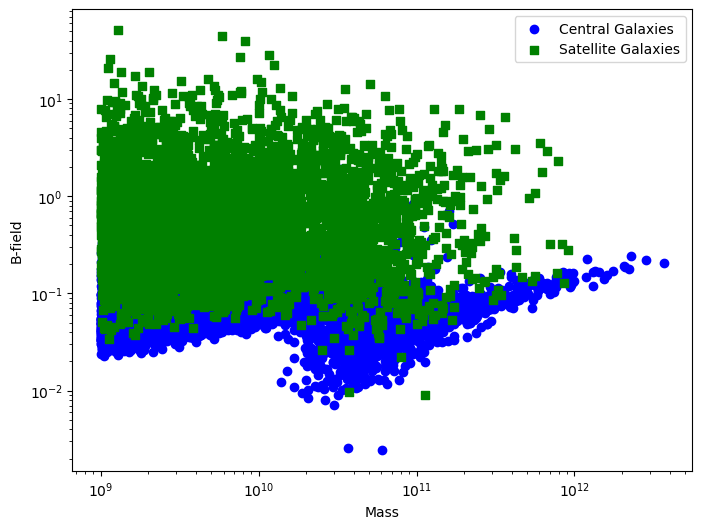

In [38]:
# Create a scatter plot
plt.figure(figsize=(8, 6))



# Plot group 1
plt.scatter(centrals_mass, centrals_bfld, color='blue', label='Central Galaxies', marker='o')

# Plot group 2
plt.scatter(satellites_mass, satellites_bfld, color='green', label='Satellite Galaxies', marker='s')

plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('B-field')
#plt.title('Scatter Plot of Two Groups')


##plot in mass bin
##error bars in bfld (stdv)
# Add a legend
plt.legend()
plt.savefig('foo.png', bbox_inches='tight')
# Show the plot
plt.show()

In [ ]:

'''

galcat = {
    'subID' : IDs,
    #'pos' : pos,
    'M_*' : s_mass,
    'SFR_inst': sfr_i
}

#save the galaxy catalog for later use
np.save(dirc+'galcat', galcat)

'''

"\n\ngalcat = {\n    'subID' : IDs,\n    #'pos' : pos,\n    'M_*' : s_mass,\n    'SFR_inst': sfr_i\n}\n\n#save the galaxy catalog for later use\nnp.save(dirc+'galcat', galcat)\n\n"

<Figure size 640x480 with 0 Axes>